## Assignment 2.1_ Aglind Reka

$\mathbf{Exercise\, 1.}$ Illustrate with a meaningful example the bias variance decomposition, as we have seen it during lesson, for the non linear Support Vector Regression model, for increasing vaues of the regularization parameter _C_ (for example C = 1e-3, 1e-2, 1e-1, 1, 1e2, $\ldots$).


In [1]:
# Here I import every library I'll need
import numpy as np
import pandas as pd
from sklearn.svm import SVR
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

``Bias Variance Decomposition``

Within a generative model setting, we can assume that an observed target value $y_i$ given the data  $x_i$ is a noisy realization of an underlying function $f$. In a general form: $y = y(x) = f(x) + \epsilon,$ with $\epsilon \sim \mathcal{N}(0,\sigma^2)$. The distribution of $y$ at a point $x$ has the following parameters: 

$$\mathbf{E}_y[y|x] = f(x)$$
$$\mathbf{Var}_y(y|x) =  \sigma^2$$

In [2]:
#Declaration variables

min_ = -5
max_ = 5
n_samples = 20
sample_draws = 20
noise_level = 1

degree = 1e-5
par_range = 8

``Function declarations``

In [3]:
function = lambda x: 0.8 * np.sin(x) + 0.2 * x


def sample_data_batch(min_, max_, function, n_samples, noise_level=0.5):
   
    X = np.linspace(min_, max_, n_samples)
    noise = noise_level * np.random.randn(n_samples) #noise
    return [X, function(X) + noise]                  #[X, f(x) + £]

def b_v(min_, max_, n_samples, noise_level, function,degree, parameter_range, sample_draws, show_plots=True):
    
    # Variables where I want to store all the bias, variance and the sum of two
    all_bias = []
    all_variance = []
    all_bias_variance = []
    parameters = []
    degree = degree
    if show_plots: plot_rows = int(par_range/2)+1
    
    # Matplotlib declaration
    if show_plots: 
        plt.figure(figsize=(12,15))
        plt.tight_layout()
    
    
    for i in range(par_range):
        predictions = []
        
        if show_plots: plt.subplot(plot_rows, 2, i+1)
        for j in range(sample_draws):
            
            # Data batch generation
            X, y = sample_data_batch(min_, max_, function, n_samples, noise_level)
            
            # Model training & prediction
            model = SVR(kernel='rbf', C = degree)
            model.fit(X.reshape(-1,1), y)
            preds = model.predict(X.reshape(-1,1))
            predictions.append(preds) #Here I append the predictions
            
            # Plotting of modeling
            if show_plots: 
                plt.title(f"\nparameter: {degree}", x=0.22, y=0.82)
                plt.plot(X, preds, alpha=0.1)
        
        # Estimator Plotting
        X = np.linspace(min_, max_, n_samples)
        fx = function(X)
        
        expected_pred = np.mean(predictions, 0)
        
        if show_plots: 
            plt.scatter(X, y)
            plt.plot(X, expected_pred, color = "black", linewidth=1, linestyle=":")
        
        # Here I calculate bisa, variance and both, after I add in the diferent lists created above
        bias = np.sum((fx - expected_pred)**2)
        var_pred = np.var(predictions, 0)
        variance = np.sum(var_pred)
        all_bias.append(bias)
        all_variance.append(variance)
        all_bias_variance.append(bias + variance)

        
        parameters.append(f"{degree}")
        # update parameter 
        degree *= 10
        
    # Final plot display
    if show_plots: plt.show()
    
    return all_bias, all_variance, all_bias_variance, parameters

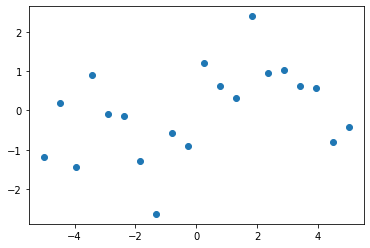

In [4]:
X, y = sample_data_batch(min_, max_, function, n_samples, noise_level)
plt.scatter(X,y)

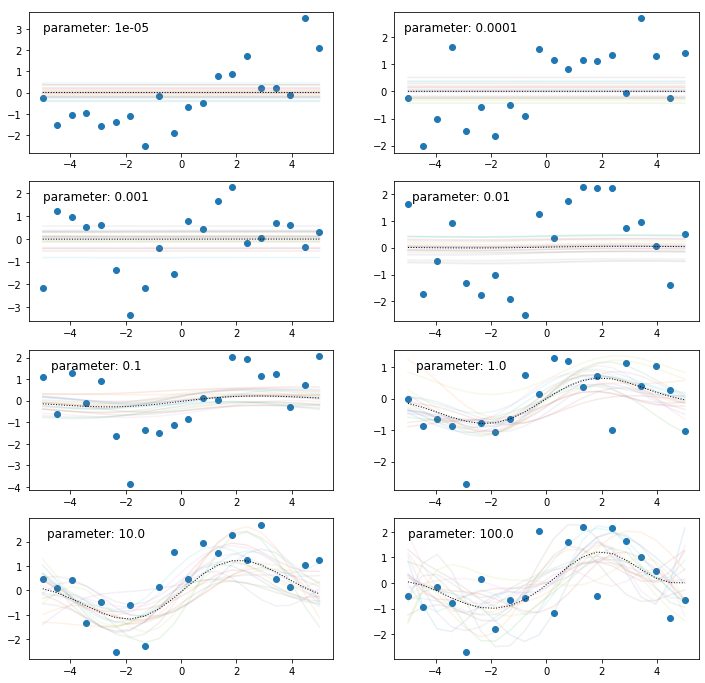

In [5]:
all_bias, all_variance, all_bias_variance, parameters = b_v(
    min_, max_, 
    n_samples, noise_level, function,
    degree, 
    par_range, 
    sample_draws
)

Here I'm going to print bias, variance and both

In [6]:

print("All the values of bias: ", all_bias)
print("All the values of variance: ", all_variance)
print("All the values of bias_variance: ", all_bias_variance)

All the values of bias:  [9.925804592367347, 9.919861175652521, 9.880869829788267, 9.341981700627718, 5.878520820718917, 1.4387062228218948, 0.550904591631697, 0.2768403951240911]
All the values of variance:  [1.1266548313328097, 1.3354725924156763, 2.364872725520888, 1.7061452535772499, 1.764146911538028, 2.5868320976021533, 5.968477550302049, 8.871737392960846]
All the values of bias_variance:  [11.052459423700157, 11.255333768068198, 12.245742555309155, 11.048126954204967, 7.642667732256944, 4.025538320424048, 6.519382141933747, 9.148577788084937]


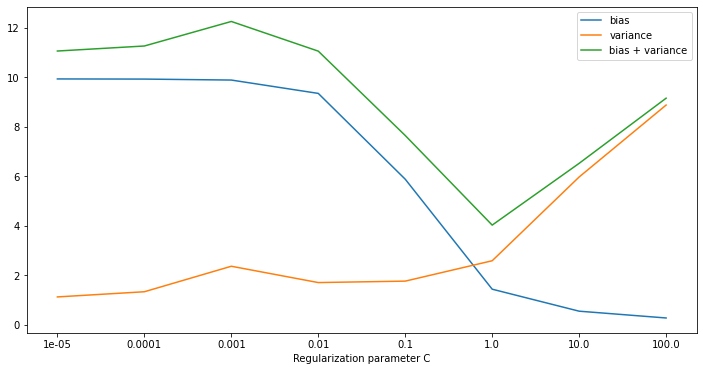

In [7]:
# Plotting of bias variance decomposition

plt.figure(figsize=(12,6))
plt.plot(parameters, all_bias, label = 'bias')
plt.plot(parameters, all_variance, label = 'variance')
plt.plot(parameters, all_bias_variance, label = 'bias + variance')
plt.xlabel('Regularization parameter C')
plt.legend()
plt.show()

Like I see on the graph, the bias decreases, variance after the parameter 0.1 start to increase and 
in the bias + variance I see an increasing in 1.0.

``So I can say that I achieve my best bias-variance trade-off with the given dataset parameters when the regularization parameter of the SVM model is set to 1.0``

$\mathbf{Exercise\, 2.}$ Modify the example of Exercise 1 to show the effect of increasing noise values on the bias and on the variance.

In [8]:
noise_values = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]

In [9]:
biases = []
variances = []
bias_variances = []

for i in noise_values:
    b, v, b_var, _ = b_v(
        min_, max_, 
        n_samples, i, function,
        degree, 
        par_range, 
        sample_draws,
        False
    )
    biases.append(b[0])
    variances.append(v[0])
    bias_variances.append(b_var[0])

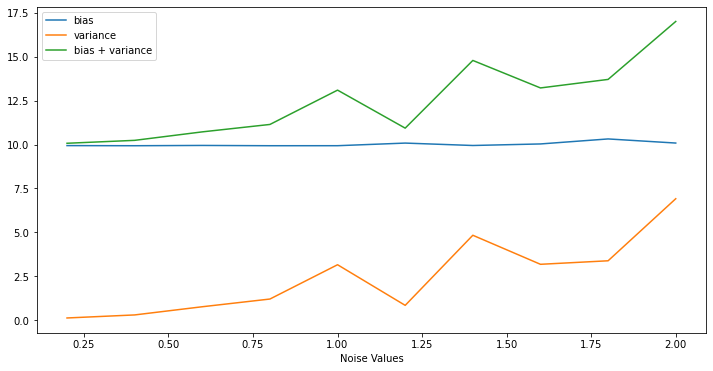

In [10]:
# Plotting of bias variance depended on noise

plt.figure(figsize=(12,6))
plt.plot(noise_values,biases, label = 'bias')
plt.plot(noise_values,variances, label = 'variance')
plt.plot(noise_values,bias_variances, label = 'bias + variance')
plt.xlabel('Noise Values')
plt.legend()
plt.show()

I see that bias is like costand, and variance increases.

$\mathbf{Exercise\, 3.}$ Still from the example of Exercise 1, compute the difference between training error and testing error for different vaues of the regularization parameter _C_. 

In [11]:
min_ = -5
max_ = 5
n_samples = 20
sample_draws = 20
noise_level = 1

degree = 1e-5
par_range = 8

In [12]:
def train_test_error(min_, max_, n_samples, noise_level, function, degree, par_range, sample_draws):
    
    # Variable declariation
    train_error = []
    test_error = []
    parameters = []
    degree = degree
    
    
    for i in range(par_range):
        
        train_e = []
        test_e = []
        
        for j in range(sample_draws):
            # Data batch generation
            X_train, y_train = sample_data_batch(min_, max_, function, n_samples, noise_level)
            X_test, y_test = sample_data_batch(min_, max_, function, n_samples, noise_level)
            # Model training & prediction
            
            model = SVR(kernel='rbf', C = degree)
            model.fit(X_train.reshape(-1,1), y_train)
            train_preds = model.predict(X_train.reshape(-1,1))
            test_preds = model.predict(X_test.reshape(-1,1))
            # appends errors
            train_e.append(np.mean((y_train - train_preds)**2))
            test_e.append(np.mean((y_test - test_preds)**2))

        # appends the error for the parameter
        train_error.append(np.mean(train_e))
        test_error.append(np.mean(test_e))
        
        
        parameters.append(f"{degree}")
        
        degree *= 10
    
    return train_error, test_error, parameters

In [13]:
# Calculation 

train_error, test_error, parameters = train_test_error(
    min_, max_, 
    n_samples, noise_level, function,
    degree, 
    par_range, 
    sample_draws
)

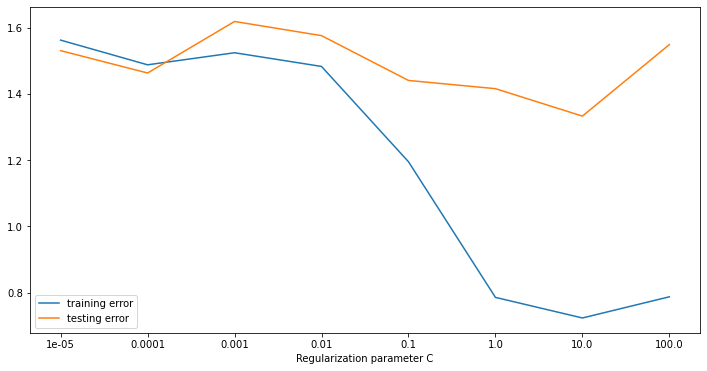

In [14]:
# Plotting of train-test errors

plt.figure(figsize=(12,6))
plt.plot(parameters, train_error, label = 'training error')
plt.plot(parameters, test_error, label = 'testing error')
plt.xlabel('Regularization parameter C')
plt.legend()
plt.show()

The training error decreases as the regularization parameter increases, while testing error plateaus after reaching parameter C equal to 10.0.


## Assignment 2.2

We go back to the usual iris dataset

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# importing the data from sklearn
from sklearn.datasets import load_iris

# importing the data from sklearn
from sklearn.datasets import load_iris
iris_dataset = load_iris()

# extracting the relevant information
data = iris_dataset.data
data_feature_names = iris_dataset.feature_names
target = iris_dataset.target
target_names = iris_dataset.target_names

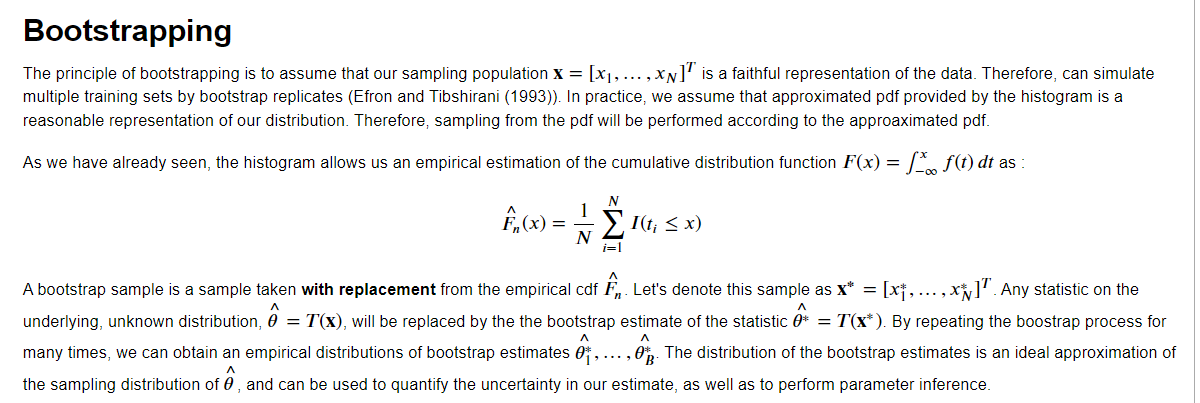

$\mathbf{Exercise\, 1.}$ Using bootstrap, compute a 95% confidence interval for the median of the feature $\mbox{sepal length (cm)}$

For example, to calculate the $\alpha\%$ confidence interval for the statistic, we look for the bootstrap percentiles of our empirical distribution at $\alpha/2$ and $1-\alpha/2$. In our discrete setting, we compute the threshold $m = \alpha/2 * B$ and quantify the percentiles $(\hat{\theta\,}_{(m)}^*, \hat{\theta\,}_{(B-m)}^*)$. 

A $95\%$ confidence interval for the  bootstrap median is:

In [16]:
alpha = 0.05
n_boot_rep = 42
conf_level = alpha / 2 * n_boot_rep

df = pd.DataFrame(data, columns=data_feature_names)
df
#I create a data frame to have it easy for later

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [17]:
def gener_boot(data, n_reps):
    boot = np.random.choice(data, size=(len(data), n_reps), replace=True)
    return boot


def confidence_interval(boot_estimator, repetitions, conf_level, estimator_name):
    

    # lower and upper bounds of the confidence interval
    low = np.sort(boot_estimator)[int(conf_level)]
    up = np.sort(boot_estimator)[int(repetitions - conf_level)]

    print(
        f"The {100-alpha}% confidence interval for the {estimator_name} is:",
        f"[{round(low, ndigits=4)}, {round(up, ndigits=4)}]",
    )
    return low, up

In [18]:
# Bootstrapping dataset

boot_data = gener_boot(
    data=df["sepal length (cm)"],
    n_reps=n_boot_rep,
)
boot_median = np.median(boot_data, axis=0)
px.box(pd.Series(boot_median, name="median"))

In [19]:
#here I calculate and generate the two values of the confidence interval
confidence_interval(
    boot_estimator=boot_median,
    repetitions=n_boot_rep,
    conf_level=conf_level,
    estimator_name="median",
)

The 99.95% confidence interval for the median is: [5.6, 6.0]


(5.6, 6.0)

$\mathbf{Exercise\, 2.}$ Compute the null distribution for the hypothesis $H_0$: the mean of $\mbox{'sepal width (cm)'}$ is the same for $\mbox{setosa}$ and $\mbox{virginica}$. 

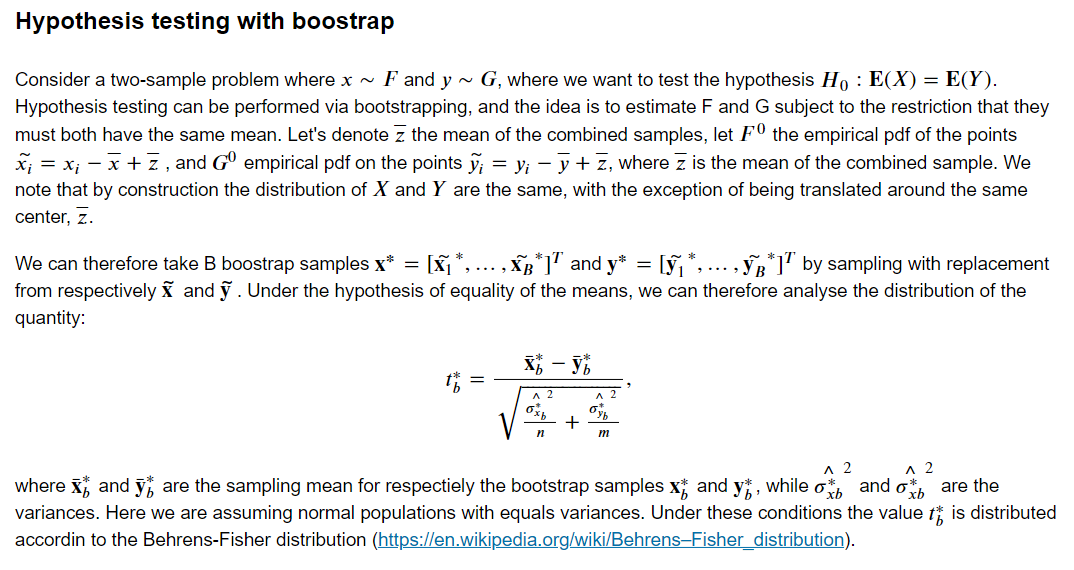

In [20]:
# Variable declarations

bootstrap_repetitions = 1000

df["target"] = target
setosa=df[df["target"] == 0]["sepal width (cm)"]
virginica=df[df["target"]== 2]["sepal width (cm)"]

In [21]:
#Statistics t for hypothesis testing

def compute_t(x, y):
    
    
    
    n_x = len(x)
    n_y = len(y)
    
    # Mean
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    #Variance
    sigma2_x = np.var(x)
    sigma2_y = np.var(y)
    
    return((mean_x-mean_y)/np.sqrt(sigma2_x/n_x+sigma2_y/n_y))


#Centered data of two distributions X and Y


def centered_data(x, y):
    
    #Statistic t
    t_obs = compute_t(x,y)
    
    #Centering the distributions
    z = np.concatenate([x, y])
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
   
    x_tilde = x - mean_x + np.mean(z)
    y_tilde = y - mean_y + np.mean(z)
    return x_tilde, y_tilde



#Bootstrapped t statistics for two distributions x and y

    
def bootstrap_t_cal(x, y, repetitions):
    
    
    n_x = len(x)
    n_y = len(y)
    t_bootstrapped = []
    
    #Centered data
    x_tilde, y_tilde = centered_data(x, y)
    
    #Centered data concatenation
    z_tilde = np.concatenate([x_tilde, y_tilde])
    
    #B bootstrapped samples
    bootstrapped_samples = np.random.choice(z_tilde, (repetitions, n_x + n_y), replace=True)
    
    #t statistic for each bootstrapped sample
    for i in range(repetitions):
        x_simulated = bootstrapped_samples[i, :n_x]
        y_simulated = bootstrapped_samples[i, n_x:]
        t_bootstrapped.append(compute_t(x_simulated, y_simulated))
    return t_bootstrapped


#Plots the null hypothesis distribution

def print_null_distribution(t_obs, t_boot):
    
    plt.figure(figsize=(12,6))
    plt.hist(t_boot, 25, histtype='step')
    plt.title('Null distribution')
    plt.axvline(x=t_obs)
    plt.show()

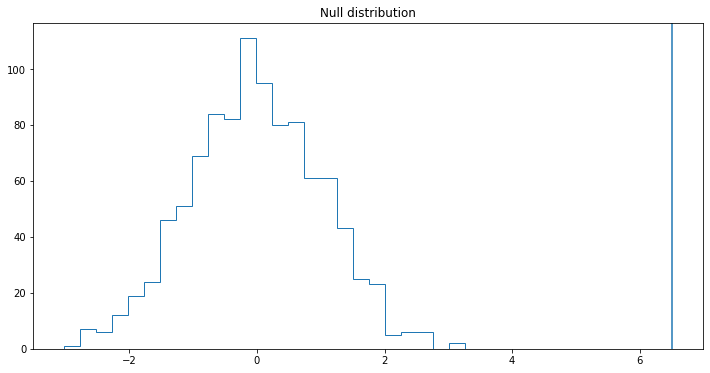

In [22]:
# Computates observed t statistic and bootstrapped t statistic

t_observed = compute_t(setosa, virginica)
t_bootstrapped = bootstrap_t_cal(setosa, virginica, 
                                          bootstrap_repetitions)
print_null_distribution(t_observed, t_bootstrapped)

$\mathbf{Exercise\, 3.}$ Compute a 2-sided bootstrapped p-value for the difference between the means of $\mbox{setosa}$ and $\mbox{virginica}$.

In [23]:


def hypothesis_testing(t_obs, t_boot, repetitions):
    
    #Significance of our test
    boot_stat = np.sum(np.abs(t_obs)>np.abs(t_boot))/repetitions
    confidence_interval = np.quantile(t_boot, [0.025, 0.975])
    
    # Printing of the results
    
    print(f"2-sided bootstrapped p-value (significance of the test) is: {1-boot_stat}")
    print(f"95% coinfidence interval for the null hypothesis: {confidence_interval}")
    print(f"Observed statistic: {t_obs}")
    
    if t_obs >= confidence_interval[0] and t_obs <= confidence_interval[1]:
        print("\nWe don't have anough prof to reject the null hypothesis.")
        print("we can say tha 'sepal width (cm)' mean is the same for the (setosa, virginica).")
    else:
        print("\nWe reject the null hypothesis.")
        print("We can say that 'sepal width (cm)' mean is different between (setosa, virginica).")

In [24]:
# Computes hypothesis testing

hypothesis_testing(t_observed, t_bootstrapped, bootstrap_repetitions)

2-sided bootstrapped p-value (significance of the test) is: 0.0
95% coinfidence interval for the null hypothesis: [-2.03790165  1.85294199]
Observed statistic: 6.515836546140536

We reject the null hypothesis.
We can say that 'sepal width (cm)' mean is different between (setosa, virginica).


$\mathbf{Exercise\, 4.}$ The central limit theorem (Lindeberg-Levy version) states that given a sequence $X_1, X_2, \ldots, X_n $ of independent variables drawn from the same ditribution, $X_i\sim F$, then:

$$ \sqrt{n} \left( \frac{1}{n} \sum X_i - \mu \right) \rightarrow \mathcal{N}(0,\sigma^2),$$

where $\mu = \mathbf{E}[F]$ and $\sigma^2 = Var(F)$.
In particular, the sample mean converges to the normal distribution:

$$ \frac{1}{n} \sum X_i \rightarrow \mathcal{N}(\mu,\frac{\sigma^2}{n}). $$

Let $F = Exponential(2)$ be the exponential distribution with parameter $\lambda = 2$, and let $X_1, X_2, \ldots, X_{20}$ be 20 samples from this distribution. Verify for this case the central limit theorem via bootstrapping. 

__**__ Remember, the mean of the exponential distribution is $\mathbf{E}(F) = 1/\lambda$, while the variance is $Var(F) = 1/\lambda^2$ __**__

Hint:

- Draw n samples (n large) from the Exponential distribution (be careful, when using $\mbox{np.random.exponential}$ the required input scale parameter is $\frac{1}{\lambda}$).
- Compute their average $\frac{\sum X_i}{20}$ and store the result

In [25]:
LAMBDA = 2
n_samples = 20
n_large = 10000

In [26]:
#bootstrapped samples from the Exponential distribution

def boot_from_exp(lamb, n_samples, n_reps):
    
    boot = []
    for _ in range(n_reps):
        boot.append(np.random.exponential(1 / lamb, n_samples))
    return boot



def normal_from_exp(lamb, n_samples, n_reps):
    
    scale = 1 / lamb
    std = np.sqrt(scale ** 2 / n_samples)
    return np.random.normal(scale, std, n_reps)

In [27]:
#Mean of bootstrap samples
boot_samples = boot_from_exp(lamb=LAMBDA, n_samples=n_samples, n_reps=n_large)
boot_mean = np.mean(a=boot_samples)  # overall mean
boot_means = np.mean(a=boot_samples, axis=1)  # mean of each bootstrap sample
boot_mean

# Sample from normal distribution
norm_dist = normal_from_exp(
    lamb=LAMBDA,
    n_samples=n_samples,
    n_reps=n_large,
)
df = pd.DataFrame({"boot":boot_means, "normal_distribution": norm_dist})
boot_means.shape, norm_dist.shape

((10000,), (10000,))

In [28]:
fig = px.histogram(df, barmode="overlay", opacity=0.3)
fig.add_vline(
    x=boot_mean,
    annotation_text="Boot mean",
    annotation_position="top left",
    annotation_font_size=15,
    annotation_font_color="red",
)
fig.add_vline(
    x=1/LAMBDA,
    annotation_text="Expectation of normal distribution",
    annotation_position="top right",
    annotation_font_size=15,
    annotation_font_color="black",
)
fig.show()

In [29]:
store_boot_mean = []
n_large_vals = [2**k for k in range(20)]
for n_large in n_large_vals:
    
    #Mean of bootstrap samples
    boot_samples = boot_from_exp(lamb=LAMBDA, n_samples=n_samples, n_reps=n_large)
    boot_mean = np.mean(a=boot_samples)  # overall mean
    store_boot_mean.append(boot_mean)
store_boot_mean = np.array(store_boot_mean)

In [30]:
df = pd.DataFrame({"boot mean": np.abs((1/LAMBDA) - store_boot_mean), "value of n_large": n_large_vals})
px.line(df, x="value of n_large", y="boot mean", log_x=True, title="l1-norm to 1/lambda")